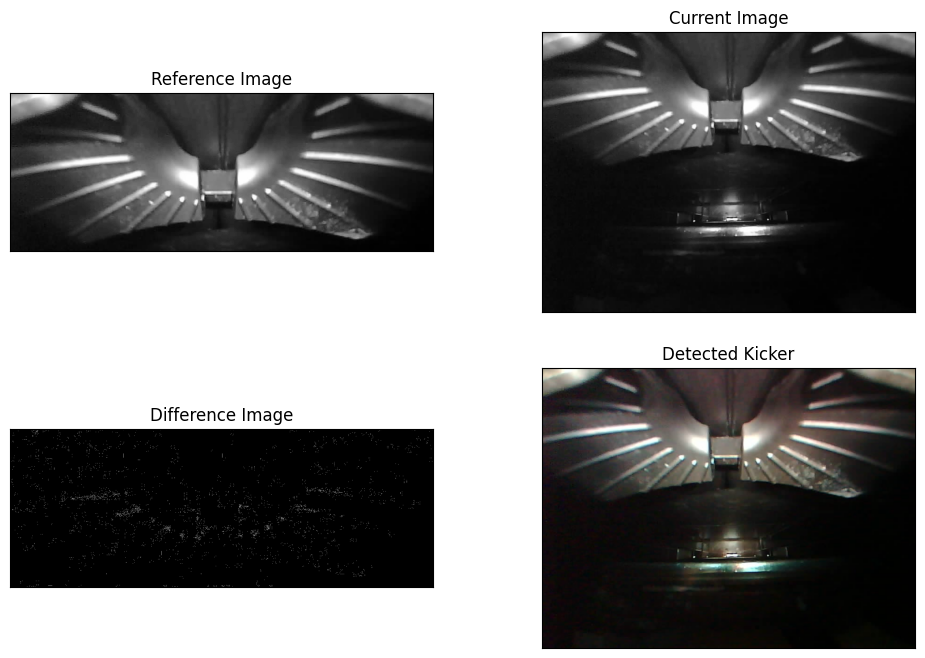

No kicker detected in the image.
Mean difference in ROI: 0.01


In [14]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def detect_kicker_bg_subtraction(reference_image_path, current_image_path, threshold=30):
    # Load reference and current images
    ref_img = cv.imread(reference_image_path)
    curr_img = cv.imread(current_image_path)

    assert ref_img is not None, "Reference image could not be read."
    assert curr_img is not None, "Current image could not be read."

    # Convert images to grayscale
    ref_gray = cv.cvtColor(ref_img, cv.COLOR_BGR2GRAY)
    curr_gray = cv.cvtColor(curr_img, cv.COLOR_BGR2GRAY)

    # Define the ROI (Upper region)
    height, width = curr_gray.shape
    roi_ref = ref_gray
    roi_curr = curr_gray[0:int(height/2), :]

    # Apply background subtraction
    diff = cv.absdiff(roi_ref, roi_curr)
    
    # Thresholding the difference image
    _, thresh = cv.threshold(diff, threshold, 255, cv.THRESH_BINARY)

    # Find contours in the thresholded image
    contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Draw contours on the current image and calculate the match quality
    kicker_detected = False
    for contour in contours:
        if cv.contourArea(contour) > 100:  # Filter out small contours
            x, y, w, h = cv.boundingRect(contour)
            cv.rectangle(curr_img, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw bounding box
            kicker_detected = True  # Kicker detected if we find a valid contour
    
    # Calculate mean difference for the ROI to determine match quality
    mean_diff = np.mean(diff)

    # Visualization
    plt.figure(figsize=(12, 8))
    plt.subplot(221), plt.imshow(ref_gray, cmap='gray')
    plt.title('Reference Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(222), plt.imshow(curr_gray, cmap='gray')
    plt.title('Current Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(223), plt.imshow(diff, cmap='gray')
    plt.title('Difference Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(224), plt.imshow(curr_img)
    plt.title('Detected Kicker'), plt.xticks([]), plt.yticks([])
    plt.show()

    # Print results
    if kicker_detected:
        print("Kicker detected in the image.")
    else:
        print("No kicker detected in the image.")

    print(f"Mean difference in ROI: {mean_diff:.2f}")

# Test the function
reference_image_path = 'template image/template.jpg'  # Replace with your reference image path
current_image_path = 'image collection/CV Image Collection/03 Kicker Detection/800x600/Kicker at front position/Trial 1.jpg'      # Replace with your current image path

detect_kicker_bg_subtraction(reference_image_path, current_image_path, threshold=30)
